In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float

In [5]:
# Create engine using the hawaii.sqlite database file located in Resources folder.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# We can view all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table

Station = Base.classes.station
Measurement = Base.classes.measurement



In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the column names and data types of Station class.
stations_columns = inspector.get_columns("station")
for station in stations_columns:
    print(station["name"], station["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Display the column names and data types of Measurement class.
measurements_columns = inspector.get_columns("measurement")
for measurement in measurements_columns:
    print(measurement["name"], measurement["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
#1 year ago date is last_date minus 1 year = 2016-08-23.

('2017-08-23')

In [13]:
# Perform a query to retrieve the date and precipitation scores from 2016-08-23 to 2017-08-23.
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23')
for data in prcp_data:
    print(data.date, data.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

2017-06-08 0.01
2017-06-09 0.0
2017-06-10 0.53
2017-06-11 0.14
2017-06-12 0.35
2017-06-13 0.1
2017-06-14 0.21
2017-06-15 0.3
2017-06-16 0.02
2017-06-17 0.02
2017-06-18 0.18
2017-06-19 0.19
2017-06-20 0.17
2017-06-23 None
2017-06-26 None
2017-06-29 None
2017-06-30 0.0
2017-07-03 None
2017-07-05 None
2017-07-07 None
2017-07-08 0.06
2017-07-09 0.0
2017-07-10 0.0
2017-07-11 0.0
2017-07-12 0.02
2017-07-13 0.3
2017-07-14 0.0
2017-07-15 0.01
2017-07-16 0.12
2017-07-17 0.16
2017-07-18 0.0
2017-07-19 0.09
2017-07-20 0.0
2017-07-21 0.0
2017-07-22 0.12
2017-07-23 0.07
2017-07-24 1.19
2017-07-25 0.12
2017-07-26 0.02
2017-07-27 0.0
2017-07-28 0.14
2017-07-29 0.02
2017-07-31 None
2017-08-01 0.12
2017-08-02 0.05
2017-08-03 0.01
2017-08-04 0.04
2017-08-06 0.0
2017-08-07 0.0
2017-08-08 0.1
2017-08-09 0.0
2017-08-10 0.0
2017-08-11 0.0
2017-08-13 None
2017-08-14 0.01
2017-08-15 0.0
2017-08-16 0.0
2017-08-17 0.0
2017-08-18 0.0
2017-08-19 0.0
2017-08-20 0.01
2017-08-21 0.02
2017-08-23 0.0
2016-08-23 None
2

2017-05-06 0.0
2017-05-07 0.02
2017-05-08 0.73
2017-05-09 1.58
2017-05-10 0.2
2017-05-11 0.12
2017-05-12 0.02
2017-05-13 0.12
2017-05-14 0.17
2017-05-15 0.09
2017-05-16 0.03
2017-05-17 0.07
2017-05-18 0.13
2017-05-19 0.01
2017-05-20 0.02
2017-05-21 0.01
2017-05-22 0.06
2017-05-23 0.06
2017-05-24 0.3
2017-05-25 0.2
2017-05-26 0.0
2017-05-27 0.0
2017-05-28 0.08
2017-05-29 0.4
2017-05-30 1.12
2017-05-31 0.25
2017-06-01 0.0
2017-06-02 0.09
2017-06-03 0.08
2017-06-04 0.13
2017-06-05 0.05
2017-06-06 0.0
2017-06-07 0.0
2017-06-08 0.0
2017-06-09 0.02
2017-06-10 0.62
2017-06-11 0.74
2017-06-12 0.24
2017-06-13 0.24
2017-06-14 0.22
2017-06-15 0.55
2017-06-16 0.06
2017-06-17 0.07
2017-06-18 0.24
2017-06-19 0.08
2017-06-20 0.0
2017-06-21 0.19
2017-06-22 0.06
2017-06-23 0.12
2017-06-24 0.36
2017-06-25 0.02
2017-06-26 0.06
2017-06-27 0.01
2017-06-28 0.0
2017-06-29 0.0
2017-06-30 0.01
2017-07-01 0.08
2017-07-02 0.15
2017-07-03 0.15
2017-07-04 0.08
2017-07-05 0.0
2017-07-06 0.0
2017-07-07 0.18
2017-07-

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column.
prcp_df = pd.DataFrame(prcp_data, columns =['Date', 'Prcp']) 
  
prcp_df 

,Date,Prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [15]:
# Sort the dataframe (prcp_df) by date - by earliest to latest.
prcp_df['Date'] = pd.to_datetime(prcp_df['Date'])
prcp_df = prcp_df.sort_values(by=['Date'])
prcp_df

,Date,Prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [16]:
# Drop NaN or null values from prcp_df.

final_prcp_df = prcp_df.dropna()

final_prcp_df

,Date,Prcp
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


(0.0, 7.0)

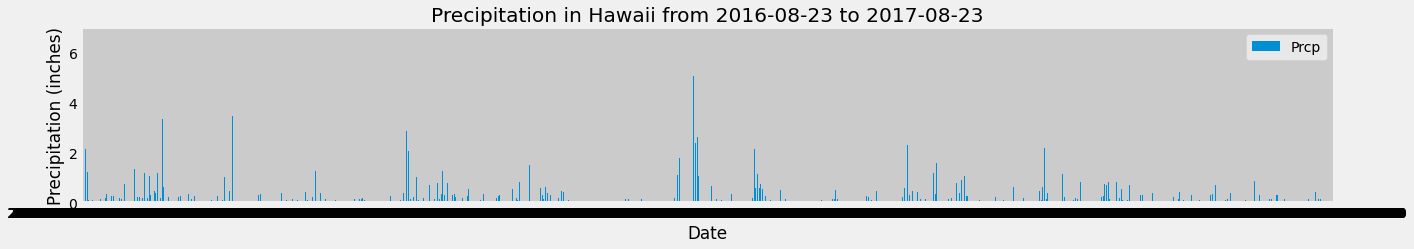

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data.
prcp_bar = final_prcp_df.plot.bar(x="Date", y="Prcp", rot=0, figsize=(20,3))
plt.ylabel("Precipitation (inches)")
plt.title ("Precipitation in Hawaii from 2016-08-23 to 2017-08-23")
plt.ylim(0,7)



In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_prcp_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(func.count(Measurement.date)).all()
station_data


[(19550)]

In [20]:
stations_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
stations_df = pd.DataFrame(stations_data, columns =['Station','Date','Prcp', "Tobs"]) 
stations_df
# What are the most active stations? (i.e. what stations have the most rows)?
number_df = stations_df.groupby("Station").count()
# List the stations and the counts in descending order.
station_list = number_df.sort_values("Date", ascending=False)
print(station_list)
print("Station USC00519281 has the most prcp and tobs datapoints.")

             Date  Prcp  Tobs
Station                      
USC00519281  2772  2772  2772
USC00519397  2724  2685  2724
USC00513117  2709  2696  2709
USC00519523  2669  2572  2669
USC00516128  2612  2484  2612
USC00514830  2202  1937  2202
USC00511918  1979  1932  1979
USC00517948  1372   683  1372
USC00518838   511   342   511
Station USC00519281 has the most prcp and tobs datapoints.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
USC00519281_temps = []
USC00519281_data = session.query(Measurement).filter(Measurement.station == "USC00519281")
for temp in USC00519281_data:
    if type(Measurement.tobs) == int:
        USC00519281_temps.append(Measurement.tobs)

mean(USC00519281_temps)

NameError: name 'mean' is not defined

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
